# 6.2 Exploring Relationships

# Step 1. Importing Visualization libraries and Data



In [107]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [108]:
matplotlib.__version__

'3.7.2'

In [109]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [110]:
#Define Path

path = r'/Users/office/Documents/SuperStore Analysis 04-01-24'

In [111]:
#import data
sales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Superstore.csv'),encoding='windows-1252')

In [112]:
#check head
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [113]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [114]:
#checking data types
sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

# Step.2 Pick Variables

In [115]:
#Create Subset
df_sales = sales[['Sales','Quantity','Discount','Profit']]

In [116]:
df_sales

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


# Step 3. Create Correlation Matrix HeatMap

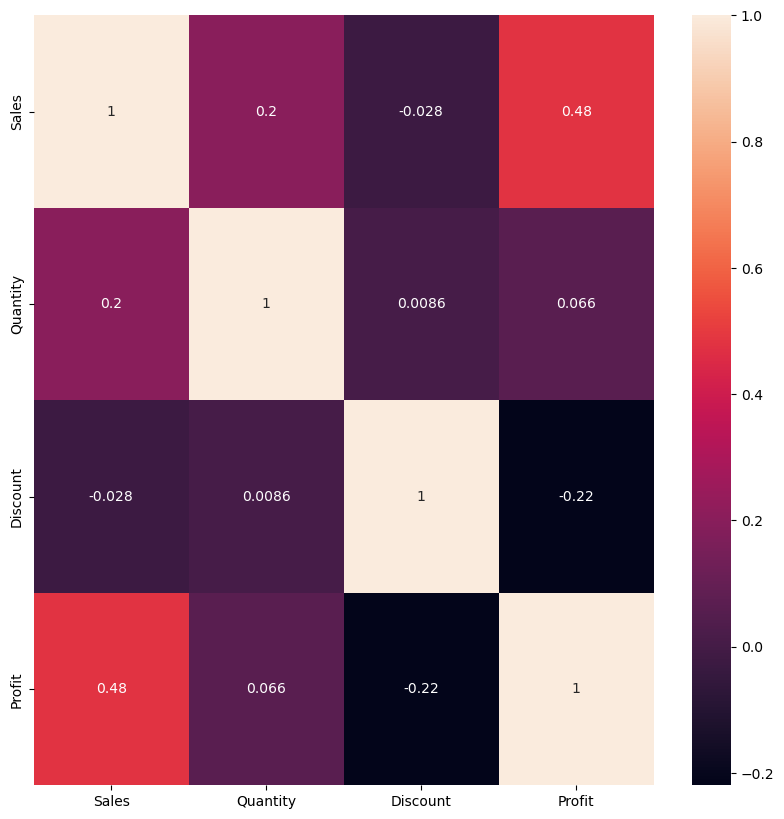

In [117]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sales.corr(), annot = True, ax = ax)

There is a moderate relationsip between sales and profit, Also there is a weak relationship between sales and quatity. there is no strong correlations between these variables.

In [118]:
#Export viz
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Heatmap.png'))

# Step 4 Create a Scatterplot

/Users/office/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


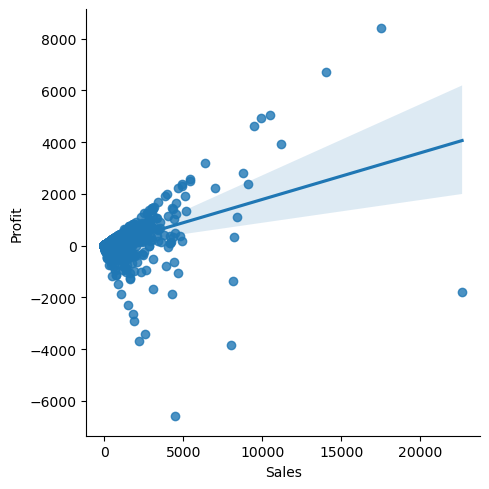

In [119]:
# Create scatterplot for the "Sales" and "Profit" columns
scatter_1 = sns.lmplot(x = 'Sales', y = 'Profit', data = df_sales)

There seems to be more points clustered together with few points away from the line with some high values that seems to be outlier which could be the cause of the skew and the moderate relationship, further checks needs to be performed on the data to confirm the values and clarify the outliers.

In [120]:
#Export viz
scatter_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_profit'))

/Users/office/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


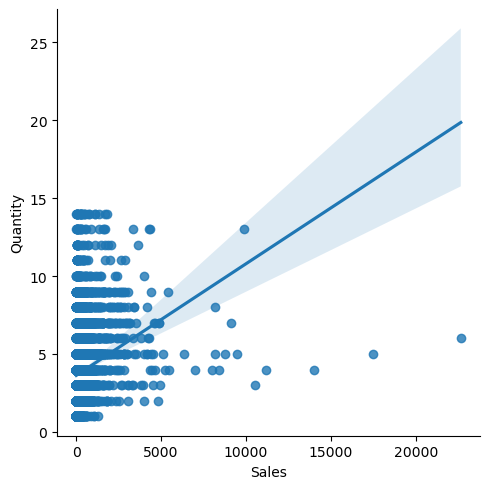

In [121]:
# Create scatterplot for the "Sales" and "Quantity" columns
scatter_2 = sns.lmplot(x = 'Sales', y = 'Quantity', data = df_sales)

there is a cluster of the points but away from the line which shows there is a weak relationship

In [122]:
#Export viz
scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Sales_quantity'))

# Step 5. Pair Plots

/Users/office/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


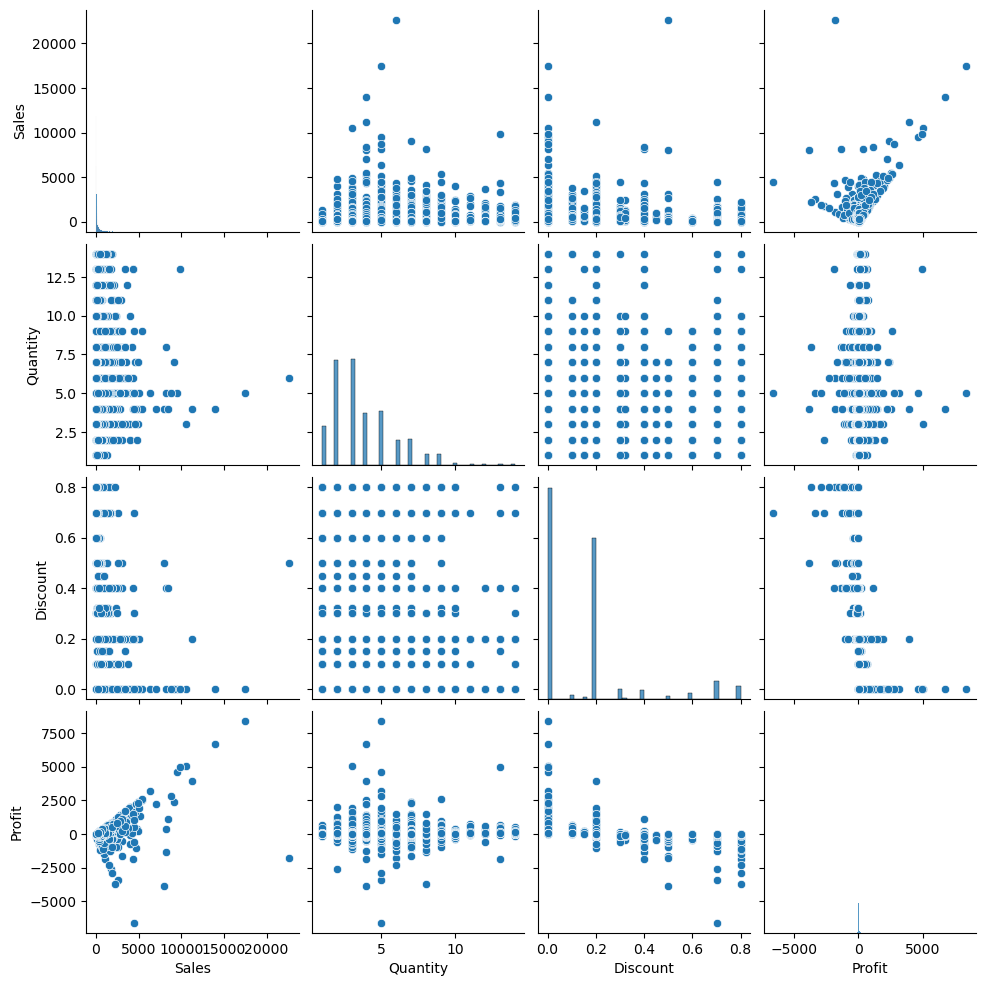

In [123]:
# Create a pair plot of entire dataset
pairplot = sns.pairplot(df_sales)

There are still no strong relationships between this variables and also there seems to be some outliers in the dataset. i will like to explore further the variables sales and discount to find out the impact of discount on sales.

In [124]:
#Export viz
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

# Step 6. Categorical Plot

# Sales vs Region

In [125]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [126]:
sales.groupby('Region').agg({'Sales': ['mean', 'min', 'max', 'sum']})

Sales                               
               mean    min        max          sum
Region                                            
Central  215.772661  0.444  17499.950  501239.8908
East     238.336110  0.852  11199.968  678781.2400
South    241.803645  1.167  22638.480  391721.9050
West     226.493233  0.990  13999.960  725457.8245

<Axes: xlabel='Sales', ylabel='Count'>

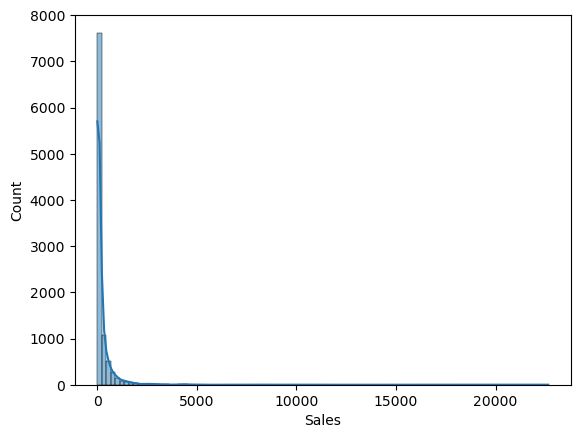

In [127]:
#See the distribution of sales
sns.histplot(sales['Sales'], bins = 100, kde = True)

Text(0.5, 1.0, 'Sales by Region')

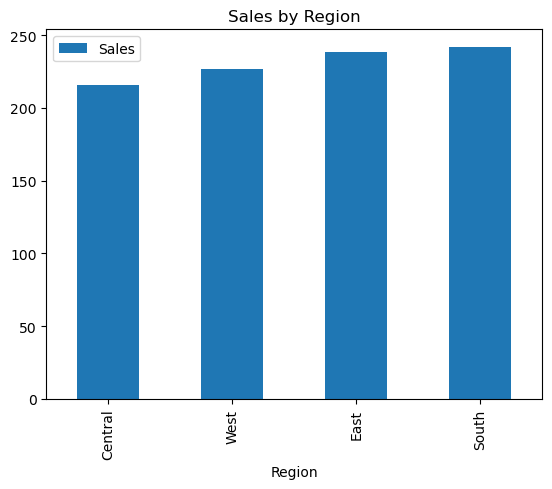

In [137]:
reg_sales = region_sales.plot.bar(x = 'Region',y = 'Sales')
plt.title ('Sales by Region')

We can see from the graph that the south region have the highest sales and the central region have the lowest sales

In [156]:
#Export viz
reg_sales.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regsales.png'))

In [46]:
sales.groupby('Segment').agg({'Profit': ['mean', 'min', 'max', 'sum']})

Profit                                   
                  mean        min        max          sum
Segment                                                  
Consumer     25.836873 -6599.9780  6719.9808  134119.2092
Corporate    30.456667 -3839.9904  8399.9760   91979.1340
Home Office  33.818664 -3399.9800  3919.9888   60298.6785

In [147]:
# group profit by segment
segment_profit = sales.groupby('Segment')['Profit'].mean().sort_values().reset_index(drop = False)



In [148]:
segment_profit

,Segment,Profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.818664


Text(0.5, 1.0, 'Profit by Segment')

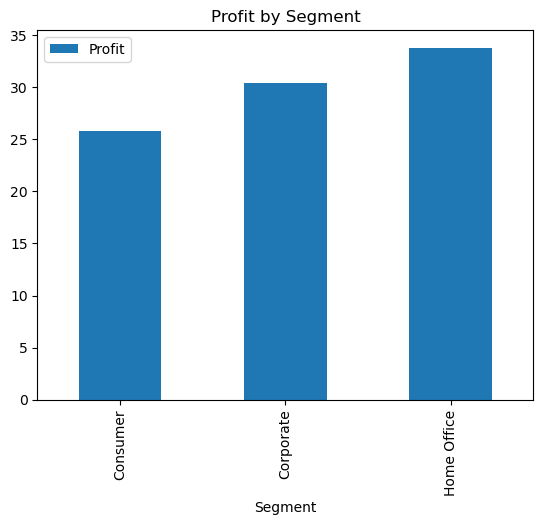

In [155]:
#plot graph
seg_prof = segment_profit.plot.bar(x = 'Segment',y = 'Profit')
plt.title ('Profit by Segment')

In [157]:
#Export viz
seg_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'segprofit.png'))

we can see that the home office segment made the highest profit with the corporate segment the next while consumer segment is the lowest in profit

# Step 7. Key questions

How are the sales in different regions? 
the 2 major regions with high sales is east and south region and the 2 lowest is central and west region


What segment produces the highest profit? 
the home office makes the highest profit followed by the corporate and then consumer segment makes the lowest profit

# Step 8. Hypothesis

1. The home office segment is the most profitable segment

2. The main region for high sales is the south

further analysis is needed to raise more hypothesis for testing.